measured is blue
simulated is red


/home/farag/open_design_environment/tools/anaconda-3-2022.05/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


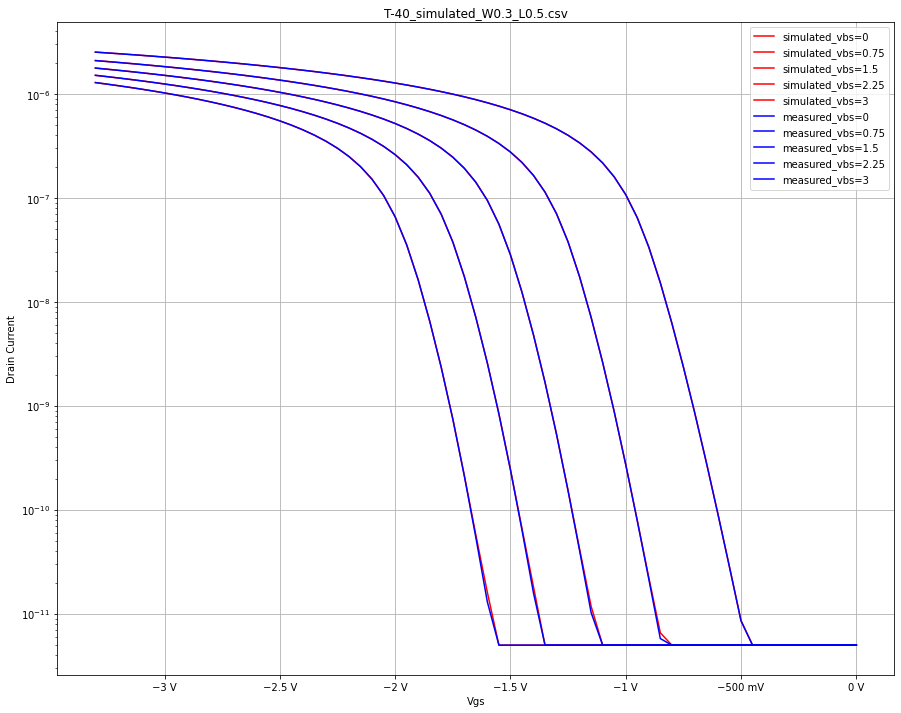

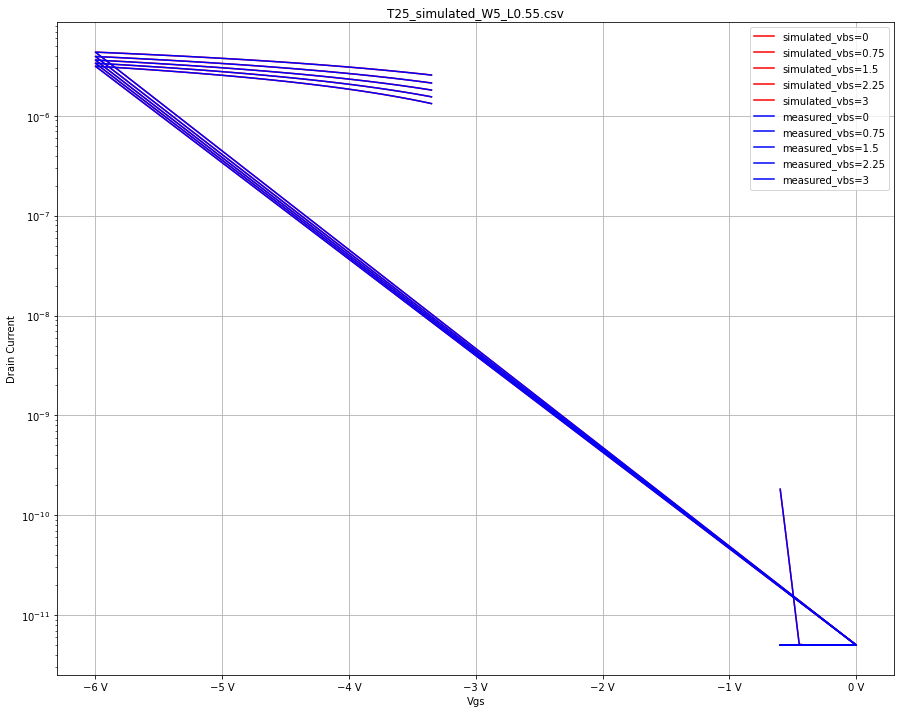

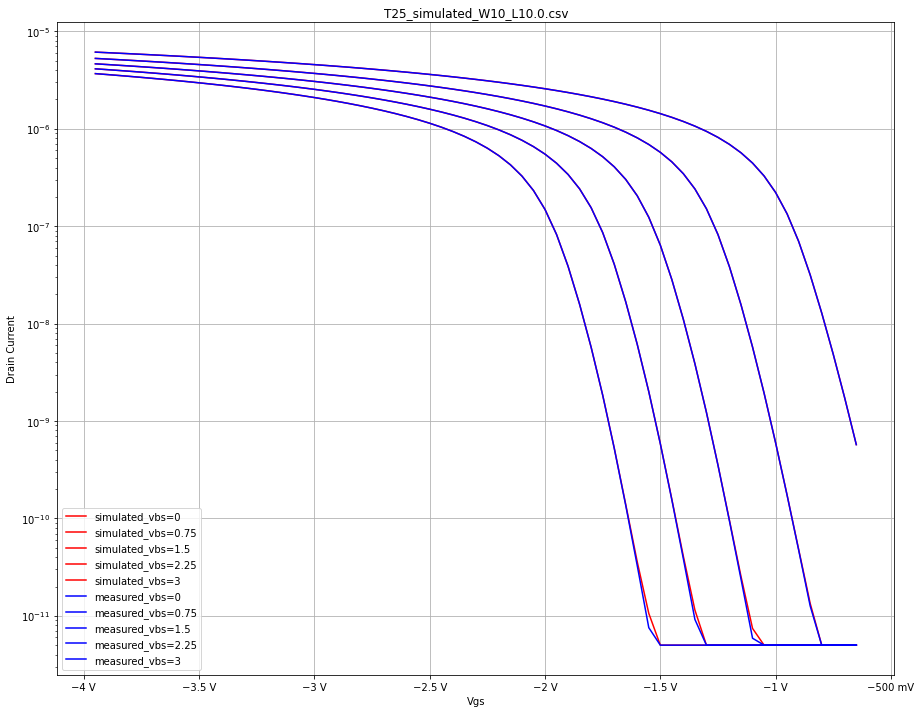

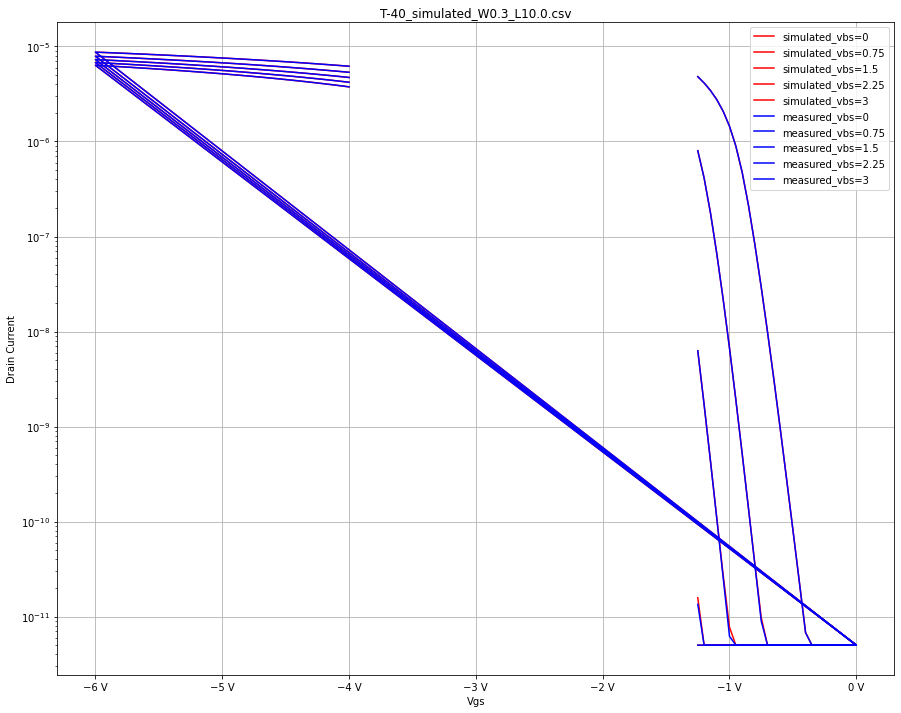

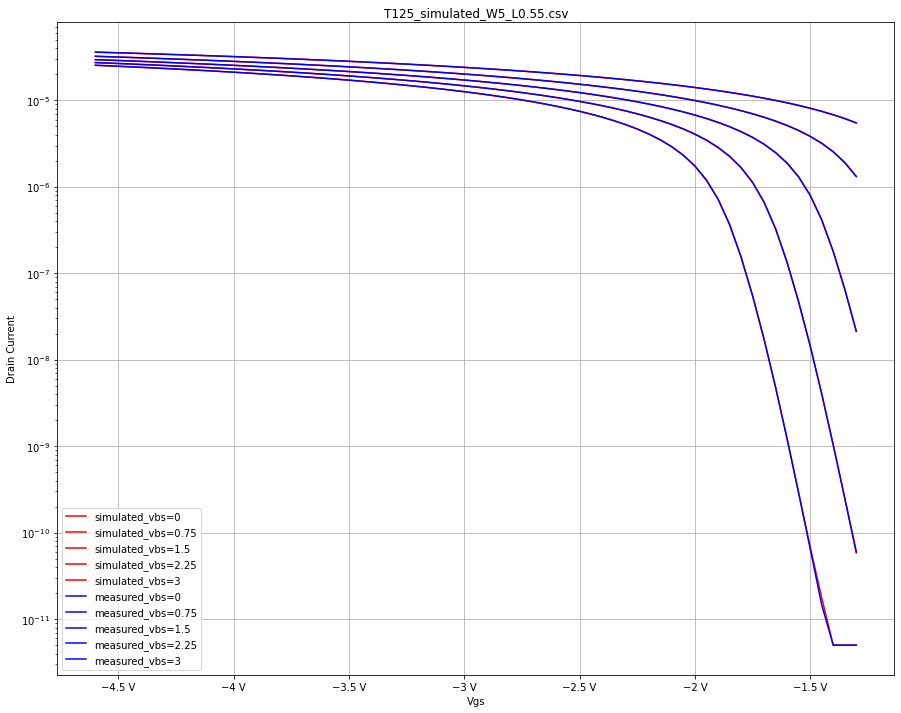

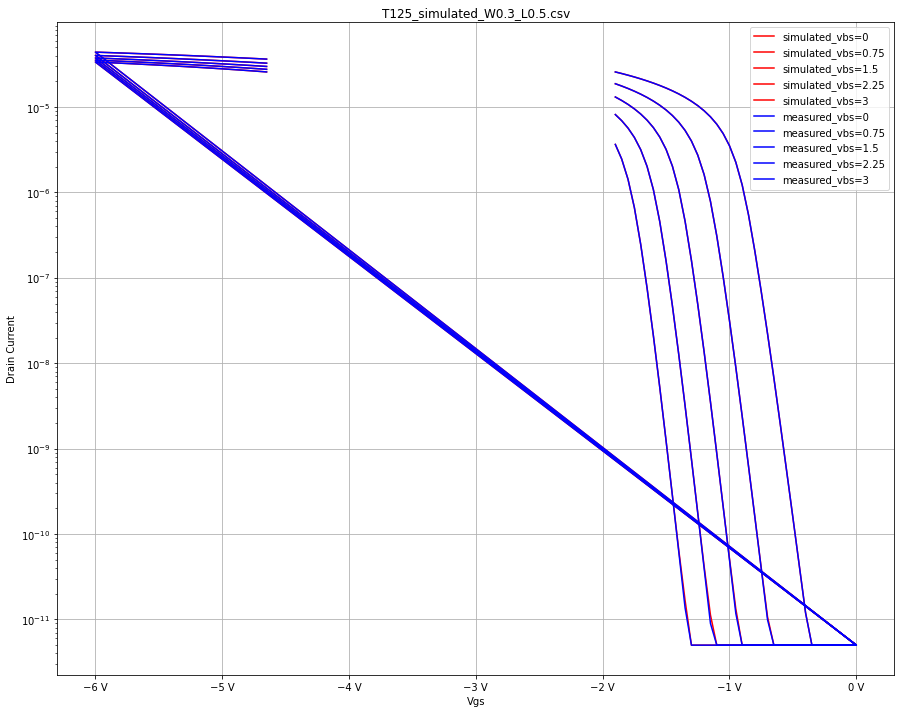

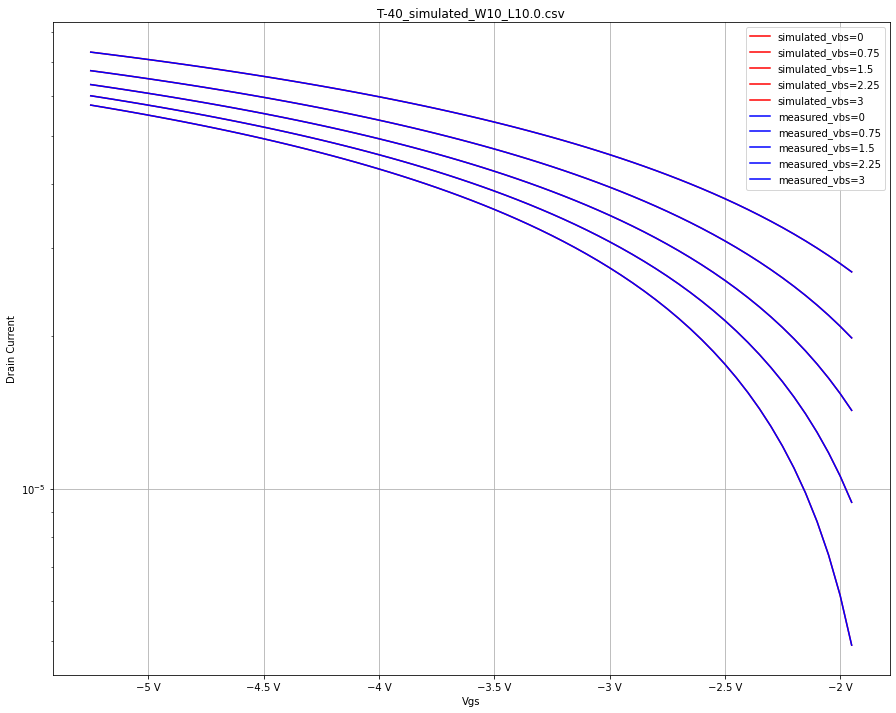

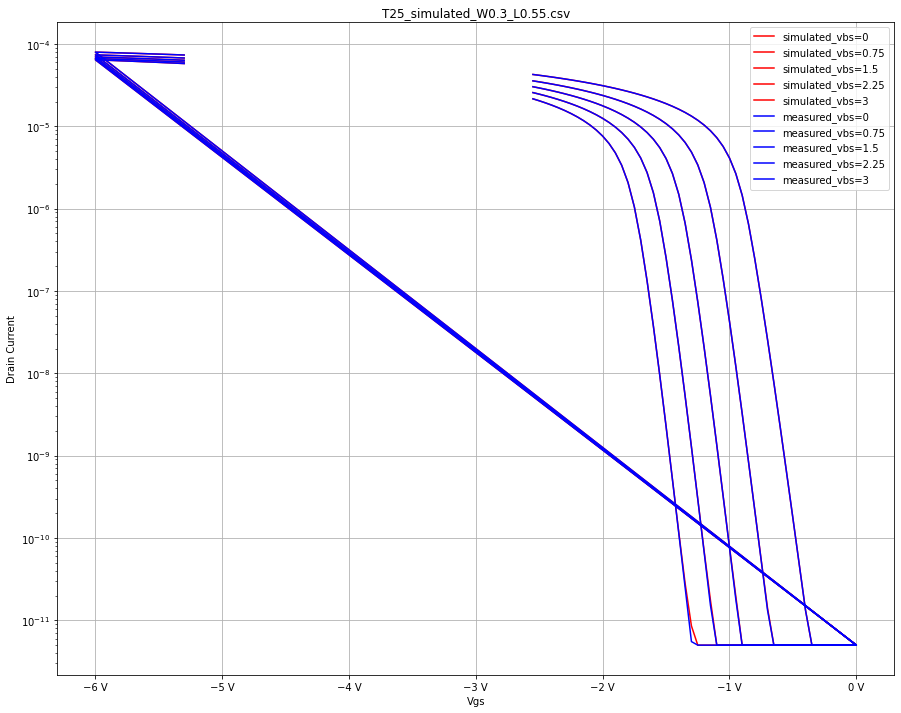

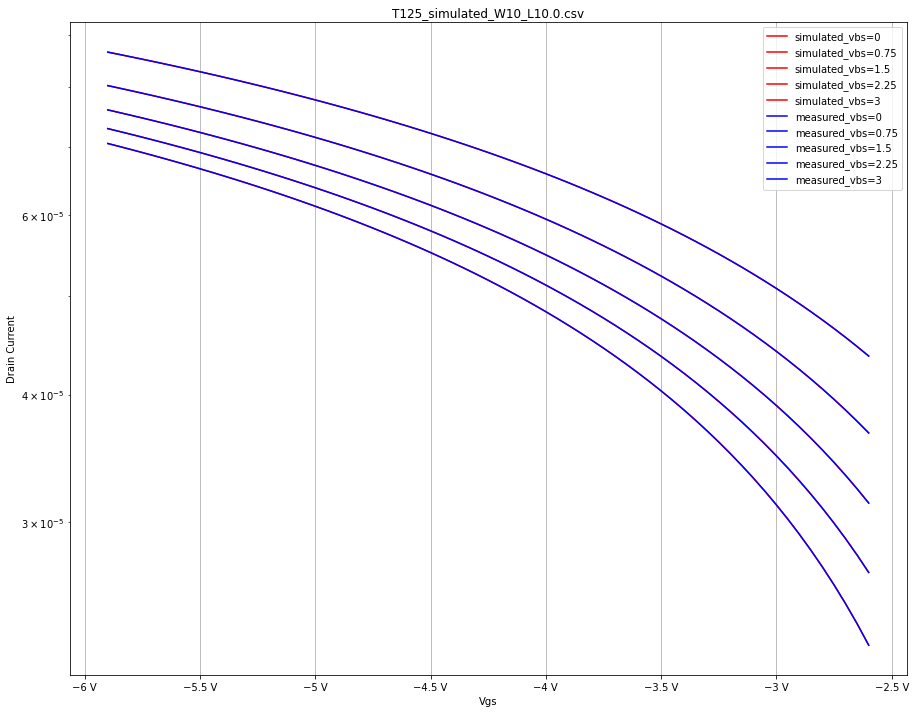

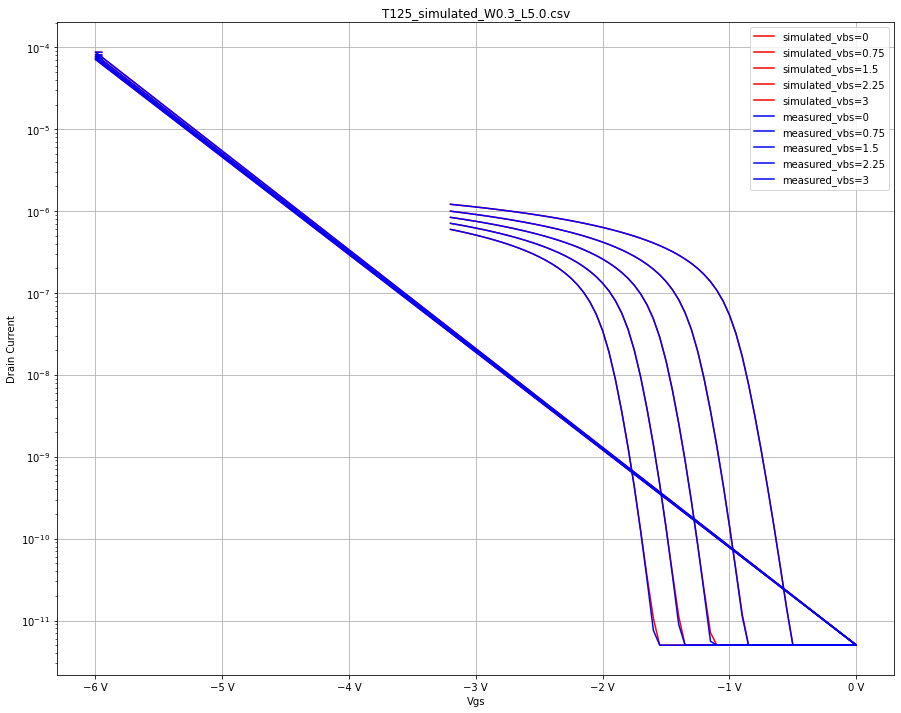

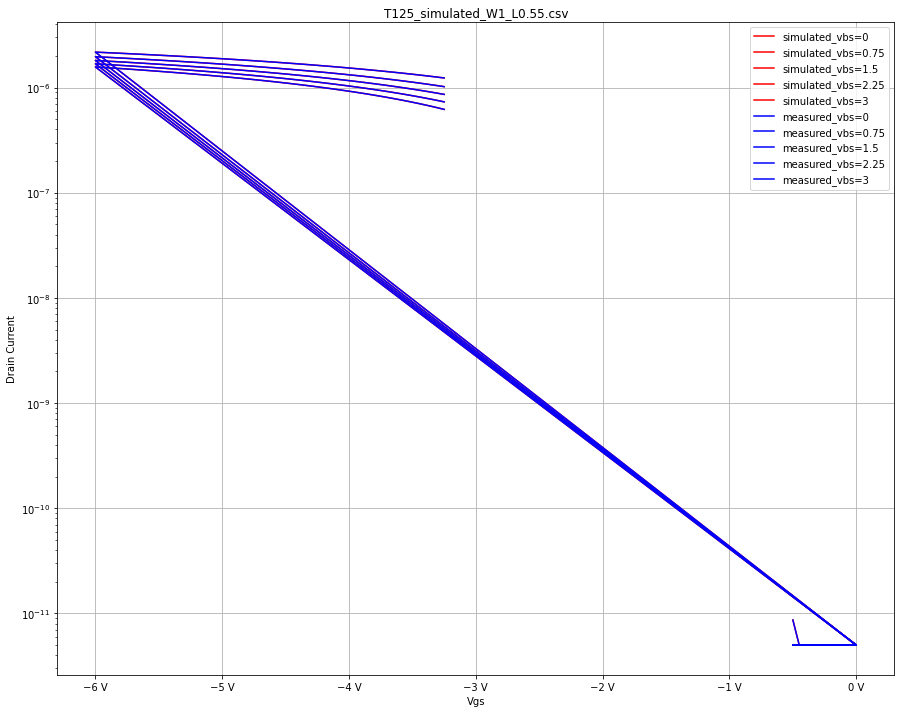

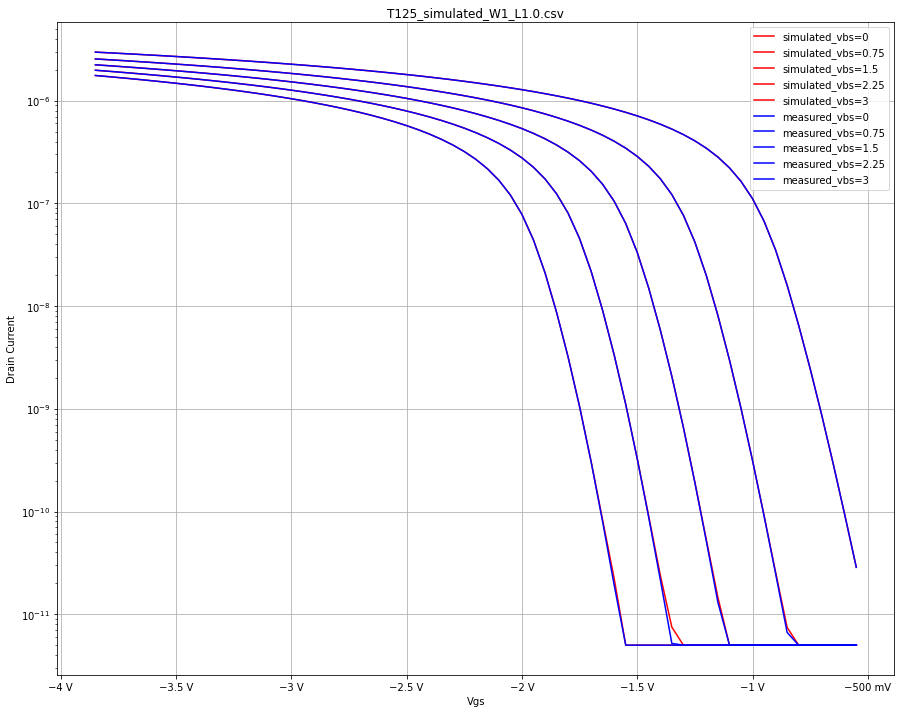

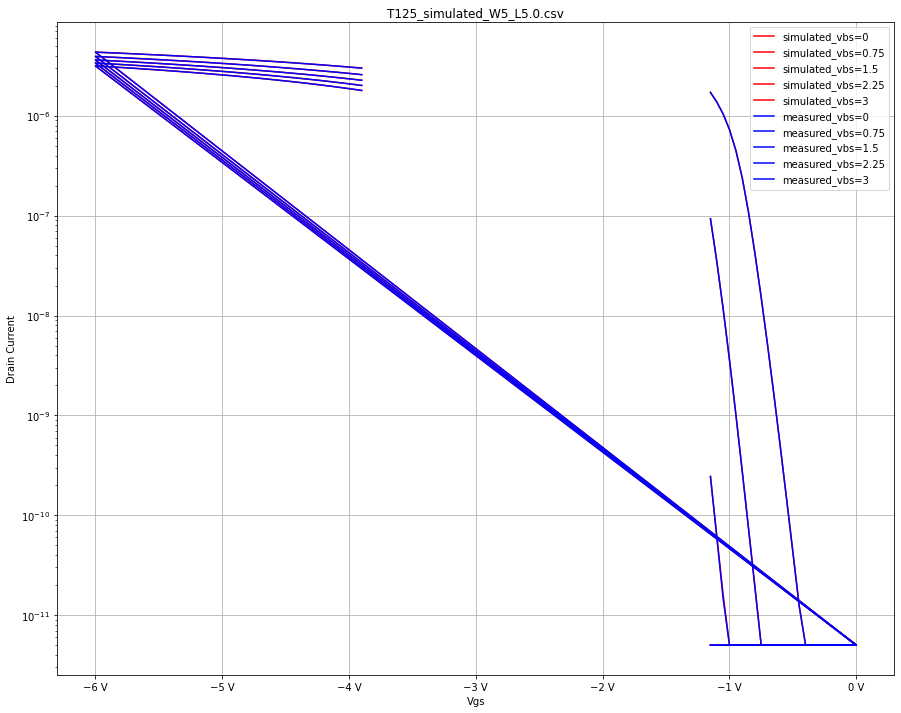

In [1]:
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter
ROWS=67


def draw(measured,sim_path):
    """draw func draw measured data vs simulated data

    Args:
        measured (str): measured files paths
        sim_path (list[str]): simulated files paths
    """    
    print("measured is blue")
    print("simulated is red")
    df1 = pd.read_csv(measured)
    for i in range(int(len(sim_path))):
        df=pd.DataFrame() 
        read_dev_name = sim_path[i].split("/")[-1]
        df[0]=df1[df1.columns[0]][i*ROWS:(i+1)*ROWS]
        df[df1.columns[1:6]]=df1[df1.columns[1:6]][i*ROWS:(i+1)*ROWS]
        ax = df.plot(x=df.columns[0], y=df.columns[1:6], color="r", figsize=(15,12))
        volt_formatter = EngFormatter(unit='V')
        amp_formatter = EngFormatter(unit='A')
        ax.xaxis.set_major_formatter(volt_formatter)
        ax.yaxis.set_major_formatter(amp_formatter)
        df[0]=df1[df1.columns[0]][i*ROWS:(i+1)*ROWS]
        df[df1.columns[6:11]]=df1[df1.columns[6:11]][i*ROWS:(i+1)*ROWS]
        df.plot(ax=ax, x=df.columns[0], y=df.columns[6:11], color="b")
        plt.grid()
        plt.xlabel('Vgs')
        plt.ylabel('Drain Current')
        plt.title(read_dev_name)     
        plt.yscale("log")   
    plt.show()

device =  [
        "nfet_03v3",
        "pfet_03v3",
        "nfet_06v0",
        "pfet_06v0",
        "nfet_06v0_nvt",
        "nfet_03v3_dss",
        "pfet_03v3_dss",
        "nfet_06v0_dss",
        "pfet_06v0_dss"
    ]

dev=3
measured = (f"mos_iv_regr/{device[dev]}/error_analysis.csv")
sim_path = glob.glob(f"mos_iv_regr/{device[dev]}/{device[dev]}_netlists/*.csv")
draw(measured,sim_path)
